In [13]:
pip install numpy pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.5/271.5 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Verification du chemin
print("Current working directory:", os.getcwd())
print("Module path:", os.path.abspath(os.path.join('..', 'src')))

# Ajouter le chemin du module preprocessing
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Added path:", module_path)

from preprocessing import load_data, calculate_statistics, normalize_data

# Charger les données
file_path = os.path.join("..", "data", "sample_data.csv")
data = load_data(file_path)

# Vérifier si les données ont été chargées correctement
if data is None:
    raise ValueError("Les données n'ont pas pu être chargées. Veuillez vérifier le chemin du fichier et son contenu.")

# Calculer les statistiques
mean_temp, max_temp, min_temp = calculate_statistics(data)
print(f"Température Moyenne : {mean_temp}°C")
print(f"Température Maximale : {max_temp}°C")
print(f"Température Minimale : {min_temp}°C")

# Normaliser les données
normalized_data = normalize_data(data)
print("Données Normalisées :", normalized_data)

Current working directory: /Users/kevo/data-science-projects/notebooks
Module path: /Users/kevo/data-science-projects/src
Température Moyenne : 31.428571428571427°C
Température Maximale : 35.0°C
Température Minimale : 29.0°C
Données Normalisées : [0.16666667 0.5        0.33333333 1.         0.66666667 0.
 0.16666667]


Fonctions de Visualisation

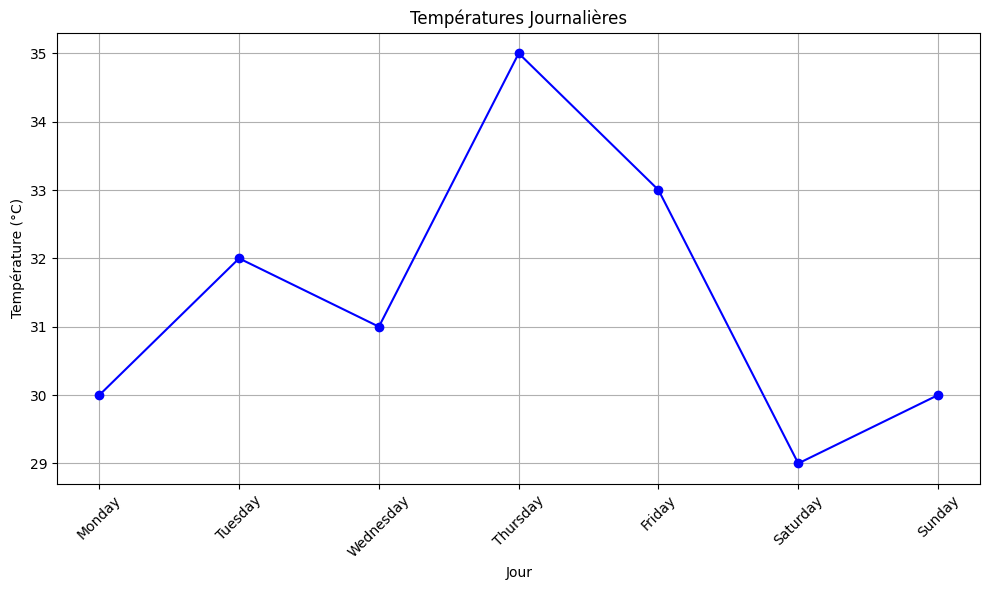

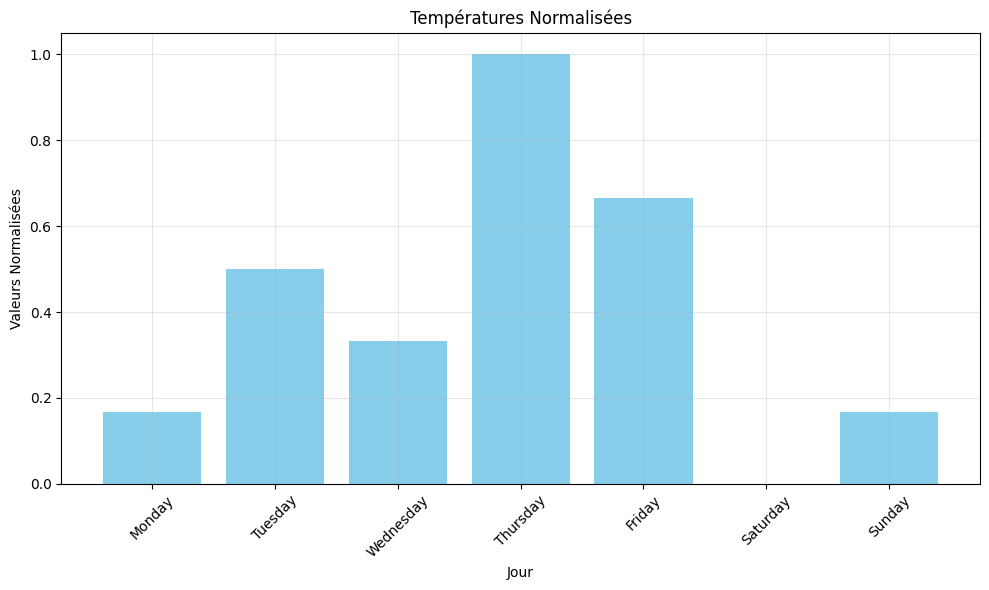

In [21]:
# Ajout du chemin système pour trouver le module src
import os
import sys
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import des fonctions
from src.eda import plot_temperatures, plot_normalized_temperatures

# Définir les jours de la semaine
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


# Tracer les températures journalières
plot_temperatures(days, data)

# Tracer les températures normalisées
plot_normalized_temperatures(days, normalize_data(data))



Parfait ! Passons à la modélisation prédictive pour prédire les températures futures. Nous allons utiliser une régression linéaire simple pour modéliser la relation entre les jours de la semaine et les températures.

Construire un modèle qui prédit la température d’un jour donné en se basant sur les données de température des jours précédents.

1. Préparer les Données pour la Modélisation
Avant de créer le modèle, nous devons convertir les jours de la semaine en une variable numérique pour que le modèle puisse les utiliser.

In [23]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 6.0 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
from src.preprocessing import encode_days
from src.model import train_model, evaluate_model


Préparer les données :



In [25]:
# Encodage des jours
days_encoded = encode_days(days).reshape(-1, 1)  # Convertir en tableau 2D
temperatures = data  # Les températures déjà chargées

# Diviser les données en jeu d'entraînement et de test
X_train, X_test = days_encoded[:5], days_encoded[5:]  # 5 jours pour entraîner, 2 jours pour tester
y_train, y_test = temperatures[:5], temperatures[5:]


Entraîner et évaluer le modèle :


In [26]:
# Entraîner le modèle
model = train_model(X_train, y_train)

# Évaluer le modèle
mse, predictions = evaluate_model(model, X_test, y_test)
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Prédictions : {predictions}")


Mean Squared Error (MSE) : 34.22500000000006
Prédictions : [34.9 35.8]


In [27]:
from src.eda import plot_predictions

plot_predictions(X_train, y_train, X_test, y_test, predictions)


ImportError: cannot import name 'plot_predictions' from 'src.eda' (/Users/kevo/data-science-projects/src/eda.py)